# Milestone 2 - Question 5: Data Plots

# Setup & Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
triplets_path = "/content/drive/MyDrive/DSE/DSE 220 Final Project/train_triplets.txt"
track_metadata_path = "/content/drive/MyDrive/DSE/DSE 220 Final Project/track_metadata.db"
genre_labels_path = "/content/drive/MyDrive/DSE/DSE 220 Final Project/msd_tagtraum_cd2.cls"

In [6]:
track_metadata_conn = sqlite3.connect(track_metadata_path)
track_metadata_sql_query = "SELECT * FROM songs"
track_metadata_df = pd.read_sql_query(track_metadata_sql_query, track_metadata_conn)
track_metadata_conn.close()


user_song_play_df = pd.read_csv(
    triplets_path,
    sep='\t',
    names=['user_id', 'song_id', 'plays'],
    nrows=500
    )


genre_labels_df = pd.read_csv(genre_labels_path,sep='\t', names = ['track_id', 'majority_genre', 'minority_genre'], skiprows=7)


In [7]:
track_metadata_with_genre_df = pd.merge(track_metadata_df, genre_labels_df,
    on='track_id',
    how='left'   #so we can keep all rows
)


# EDA


General look into the data

In [8]:
track_metadata_with_genre_df.describe()

,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000
mean,249.500755,0.556915,0.379797,1030.325652,4.213995e+06,940.437395,480.173895
std,126.229636,0.140207,0.126050,998.745002,2.640600e+06,9168.962303,5437.859242
min,0.313020,-1.000000,-1.000000,0.000000,-1.000000e+00,-1.000000,-938.000000
25%,180.740770,0.478219,0.336321,0.000000,1.974300e+06,-1.000000,0.000000
50%,228.858320,0.558878,0.386194,1969.000000,3.947503e+06,-1.000000,0.000000
75%,289.932610,0.641392,0.444066,2002.000000,6.469678e+06,-1.000000,0.000000
max,3034.905670,1.000000,1.082503,2011.000000,9.091277e+06,151082.000000,117287.000000


Checking out first 10 rows


In [9]:
track_metadata_with_genre_df.head(10)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work,majority_genre,minority_genre
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0,NaN,NaN
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0,NaN,NaN
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0,Electronic,Rap
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0,NaN,NaN
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0,NaN,NaN
5,TRMMMXN128F42936A5,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",SOZVAPQ12A8C13B63C,Berwald: Symphonies Nos. 1/2/3/4,AR2NS5Y1187FB5879D,d087b377-bab7-46c4-bd12-15debebb5d61,David Montgomery,816.53506,0.361287,0.109626,0,3360982,-1,0,NaN,NaN
6,TRMMMLR128F1494097,We Have Got Love,SOQVRHI12A6D4FB2D7,Strictly The Best Vol. 34,ARO41T51187FB397AB,d2461c0a-5575-4425-a225-fce0180de3fd,Sasha / Turbulence,212.37506,0.692923,0.453732,0,552626,-1,0,NaN,NaN
7,TRMMMBB12903CB7D21,2 Da Beat Ch'yall,SOEYRFT12AB018936C,Da Bomb,AR3Z9WY1187FB4CDC2,bf61e8ff-7621-4655-8ebd-68210645c5e9,Kris Kross,221.20444,0.588156,0.401092,1993,6435649,-1,0,NaN,NaN
8,TRMMMHY12903CB53F1,Goodbye,SOPMIYT12A6D4F851E,Danny Boy,ARA04401187B991E6E,1a9bf859-1dc2-495b-9e7c-289be7731a9f,Joseph Locke,139.17995,0.408465,0.285901,0,8376489,-1,0,NaN,NaN
9,TRMMMML128F4280EE9,Mama_ mama can't you see ?,SOJCFMH12A8C13B0C2,March to cadence with the US marines,ARCVMYS12454A51E6E,,The Sun Harbor's Chorus-Documentary Recordings,104.48934,0.419941,0.249137,0,1043208,-1,0,NaN,NaN


In [10]:
genre_labels_df.head(10)

,track_id,majority_genre,minority_genre
0,TRAAAAK128F9318786,Rock,NaN
1,TRAAAAW128F429D538,Rap,NaN
2,TRAAABD128F429CF47,Rock,RnB
3,TRAAADJ128F4287B47,Rock,NaN
4,TRAAADZ128F9348C2E,Latin,NaN
5,TRAAAED128E0783FAB,Jazz,NaN
6,TRAAAEF128F4273421,Rock,NaN
7,TRAAAEM128F93347B9,Electronic,NaN
8,TRAAAFD128F92F423A,Punk,Rock
9,TRAAAGF12903CEC202,Pop,NaN


Merging the user song dataset with the track metadata

In [45]:
songs_df= pd.merge(user_song_play_df, track_metadata_with_genre_df, on = 'song_id')
# #takes over 2 minutes and crashes


In [12]:
df_song_counts = user_song_play_df.groupby('song_id')['plays'].sum()
df_user_counts = user_song_play_df.groupby('user_id')['plays'].sum()


In [13]:
songs_df.head(10)

,user_id,song_id,plays,track_id,title,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work,majority_genre,minority_genre
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,The Cove,Thicker Than Water,ARC8CQZ1187B98DECA,ff6e677f-91dd-4986-a174-8db0474b1799,Jack Johnson,112.63955,0.832012,0.677482,0,2093263,-1,0,Rock,Folk
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Nothing from Nothing,To Die For,ARHYUI71187FB48366,8a7cf497-dc5c-4523-932d-3fcbc9a69d38,Billy Preston,153.59955,0.580555,0.482492,1974,3072847,-1,0,RnB,NaN
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Entre Dos Aguas,Flamenco Para Niños,ARC1SF21187FB51D0F,7bc8dd01-35ea-4b18-a64d-3a364dc76a52,Paco De Lucia,358.24281,0.633119,0.417718,1976,2631392,-1,0,Electronic,Metal
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Under Cold Blue Stars,Under Cold Blue Stars,ARMS97V1187B99DD98,023d64c9-93db-4a20-8c5c-2efa1a53481a,Josh Rouse,266.34404,0.675339,0.509058,2002,413957,-1,0,Rock,NaN
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,TRAHZNE128F9341B86,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,ARI4V0E1187B9B6FC2,87ebbe67-3910-4521-a418-4fe53eb912b7,The Dead 60s,141.42649,0.650281,0.451749,0,5674853,-1,0,NaN,NaN
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1,TRJPXGD128F92F17D7,Sin límites (I),Amset,ARGYPGG1187B9923B5,23121875-8f68-49c5-9988-dcb7f8e7a680,Amset,190.53669,0.576127,0.436974,0,4341517,-1,0,NaN,NaN
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,12 segundos de oscuridad,10 + Downloaded,AR1BQ6Y1187B98D586,abb91078-f7db-41f2-8f07-7f37bb739143,Jorge Drexler,246.83057,0.641037,0.412069,2006,1788507,-1,0,Latin,Pop
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,TREGAVI128F147C1CA,Ears To The Ground (Album Version),Under Cold Blue Stars,ARMS97V1187B99DD98,023d64c9-93db-4a20-8c5c-2efa1a53481a,Josh Rouse,171.17995,0.675339,0.499641,2002,413960,-1,0,NaN,NaN
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1,TRZYZWL128F4277AD2,Food Chain (Album Version),Sounds Like This,ARG3I891187FB3A391,3347dae7-1a86-4630-844e-e631f969c252,Eric Hutchinson,221.20444,0.806208,0.498077,2008,2316475,-1,0,NaN,NaN
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Stronger,Graduation,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,311.84934,0.877214,1.082503,2007,1351505,-1,0,Rap,NaN


# Plots

First thing we wanted to look at the distribution of songs across majority genre. We see that rock songs are dominant in our dataset. This is just the song data set so it doesnt contain information of user plays, but we wanted to understand our song dataset before looking at the combined user - song dataset.

In [14]:
sorted_categories = sorted(genre_labels_df['majority_genre'].unique())
# sorted_hue_categories = sorted(genre_labels_df['minority-genre'].unique())
sorted_hue_categories = sorted([str(x) for x in genre_labels_df['minority_genre'].unique()])

/tmp/ipython-input-1884268691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  d = sns.catplot(


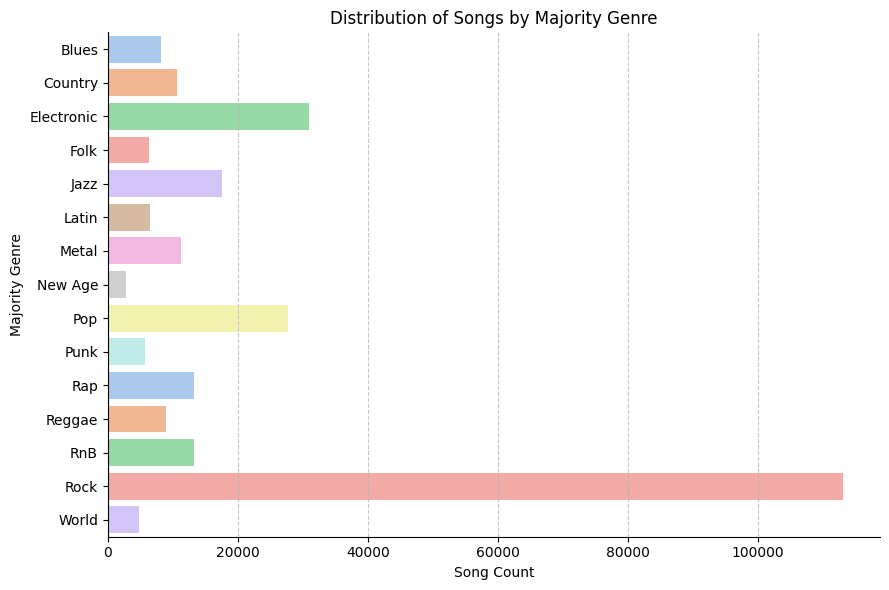

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


d = sns.catplot(
    data=genre_labels_df,
    y="majority_genre",
    kind="count",
    palette="pastel",
    order=sorted_categories,
    height=6,
    aspect=1.5
)

#add labels and title
d.set(title="Distribution of Songs by Majority Genre")
d.set_axis_labels("Song Count", "Majority Genre")

#add grid
d.ax.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



This doesnt include unknown genres so what we're looking at is the portion of known genre songs, but what about the unknowns?

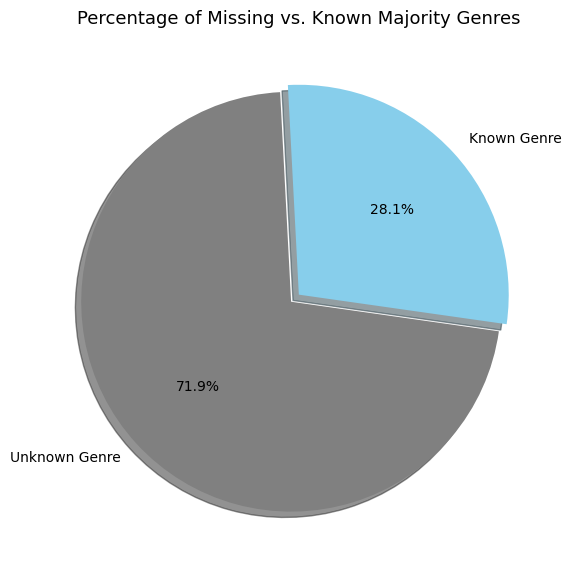

In [16]:

#counting knowns and unknowns
nan_count = track_metadata_with_genre_df['majority_genre'].isna().sum()
not_nan_count = track_metadata_with_genre_df['majority_genre'].notna().sum()

#assigning labels and colors
labels = ['Unknown Genre', 'Known Genre']
sizes = [nan_count, not_nan_count]
colors = ['grey', 'skyblue']

#plot details
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=93,
    colors=colors,
    explode=(0.05, 0),
    shadow=True
)

plt.title("Percentage of Missing vs. Known Majority Genres", fontsize=13)
plt.tight_layout()
plt.show()


There are a lot of unknown genres which may cause an imbalance problem

Then wanted to check out the distribution of songs across minority genres, with rock sitll being the most prevalent genre. From the unknown investigation above we can assume that minority genre will have a large percentage of unknown.

/tmp/ipython-input-4024962668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  d = sns.catplot(


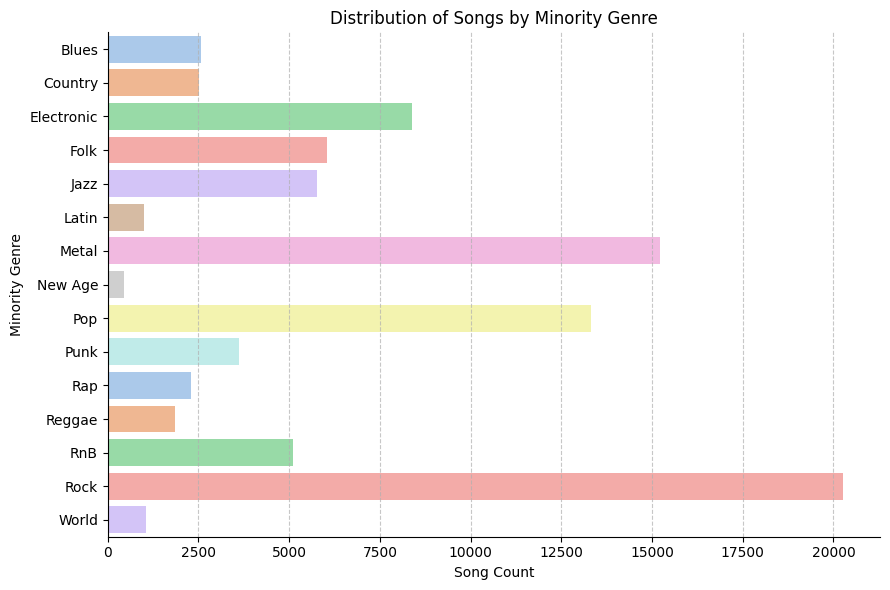

In [17]:
#minority genre distribution
d = sns.catplot(
    data=genre_labels_df,
    y="minority_genre",
    kind="count",
    palette="pastel",
    order=sorted_categories,
    height=6,
    aspect=1.5,
    legend=False
)

#add labels
d.set(title="Distribution of Songs by Minority Genre")
d.set_axis_labels("Song Count", "Minority Genre")

#add grid
d.ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This plot combines majority genre in the y axis and minority genre in the actual bars, this further highlights the difference in songs by genre.

In [18]:
genre_labels_df.head(10)

,track_id,majority_genre,minority_genre
0,TRAAAAK128F9318786,Rock,NaN
1,TRAAAAW128F429D538,Rap,NaN
2,TRAAABD128F429CF47,Rock,RnB
3,TRAAADJ128F4287B47,Rock,NaN
4,TRAAADZ128F9348C2E,Latin,NaN
5,TRAAAED128E0783FAB,Jazz,NaN
6,TRAAAEF128F4273421,Rock,NaN
7,TRAAAEM128F93347B9,Electronic,NaN
8,TRAAAFD128F92F423A,Punk,Rock
9,TRAAAGF12903CEC202,Pop,NaN


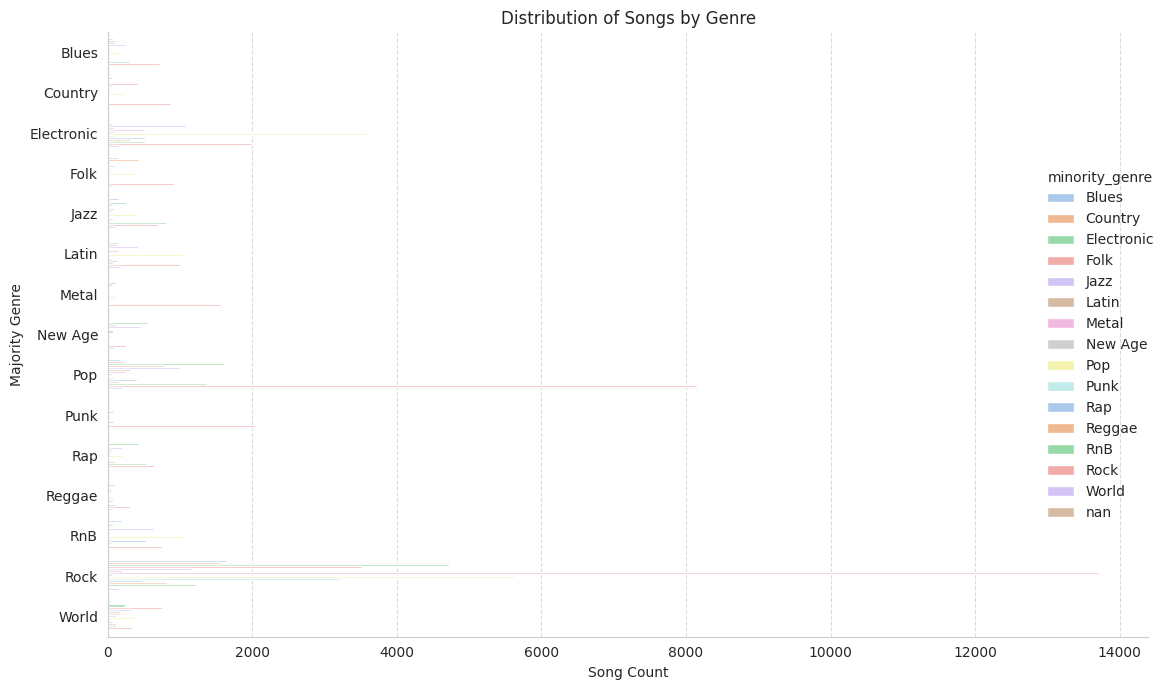

In [41]:
#both majority and minority genre plot
d = sns.catplot(
    data=genre_labels_df,
    y="majority_genre",
    hue = "minority_genre",
    kind="count",
    palette="pastel",
    order=sorted_categories,
    hue_order=sorted_hue_categories,
    height=7,
    aspect=1.5
)

#set title and labels
d.set(title="Distribution of Songs by Genre")
d.set_axis_labels("Song Count", "Majority Genre")
#add grid
d.ax.grid(True, axis='x', linestyle='--', alpha=0.7)
#Change Legend

plt.tight_layout()
plt.show()


Now looking at the individual columns and looking for missing data

From the describe table above we noticed the min year was 0 so we wannted to look at unknowns here and also have a good amount of unknowns

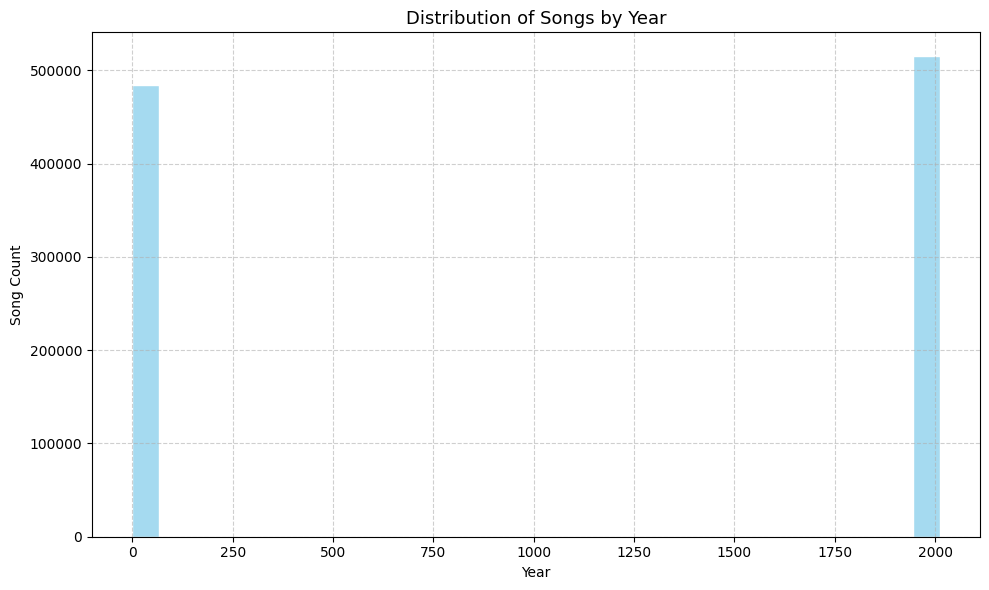

In [21]:
#year distribution
plt.figure(figsize=(10, 6))  # making image larger
sns.histplot(
    data=track_metadata_with_genre_df,
    x="year",
    bins=30,
    color="skyblue",
    edgecolor="white"
)

#labels and title
plt.title("Distribution of Songs by Year", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Song Count")

#grids :)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Saw some odd values in the min for artist hottness as well so wanted to look at the distribution, we can see there may be some uknowns or zeros in the data.

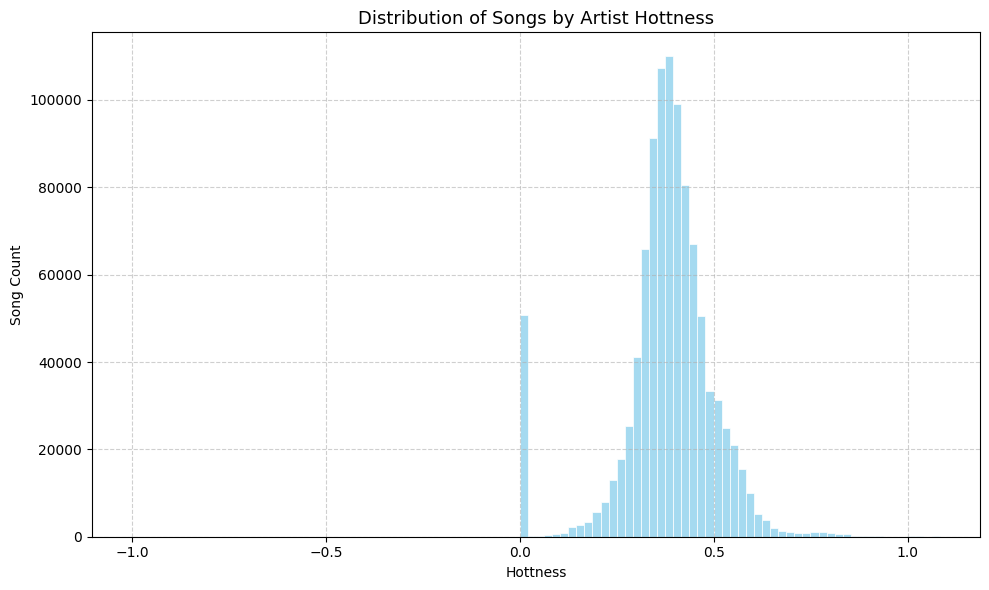

In [22]:
#year distribution
plt.figure(figsize=(10, 6))  #making image larger
sns.histplot(
    data=track_metadata_with_genre_df,
    x="artist_hotttnesss",
    bins=100,
    color="skyblue",
    edgecolor="white"
)

#labels and title
plt.title("Distribution of Songs by Artist Hottness", fontsize=13)
plt.xlabel("Hottness")
plt.ylabel("Song Count")

#grids :)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Also wanted to look at the artist familiarity column and this one seems pretty well distributed.

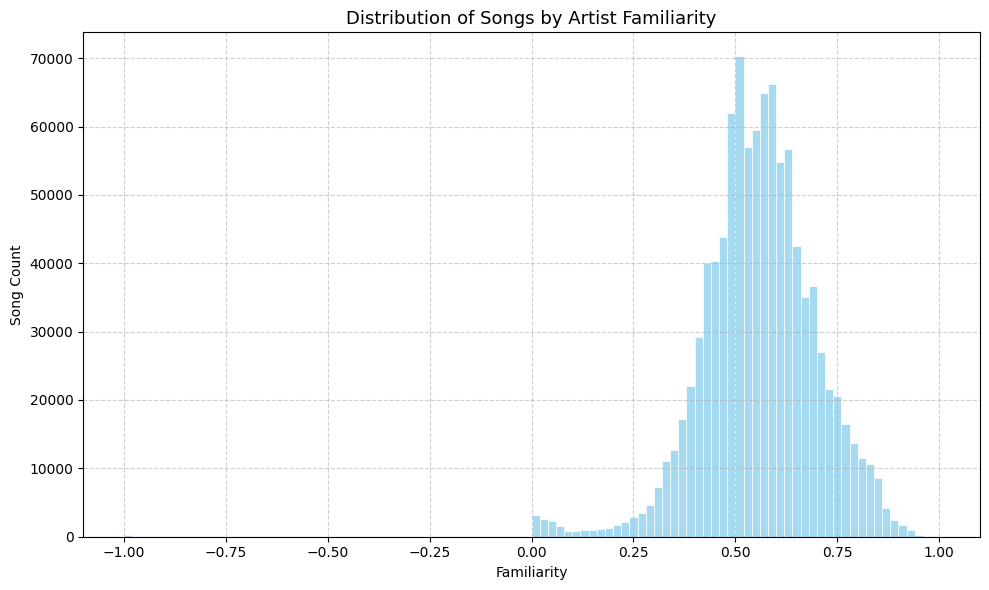

In [23]:
#familiarity distribution
plt.figure(figsize=(10, 6))  #making image larger
sns.histplot(
    data=track_metadata_with_genre_df,
    x="artist_familiarity",
    bins=100,
    color="skyblue",
    edgecolor="white"
)

#labels and title
plt.title("Distribution of Songs by Artist Familiarity", fontsize=13)
plt.xlabel("Familiarity")
plt.ylabel("Song Count")

#grids
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

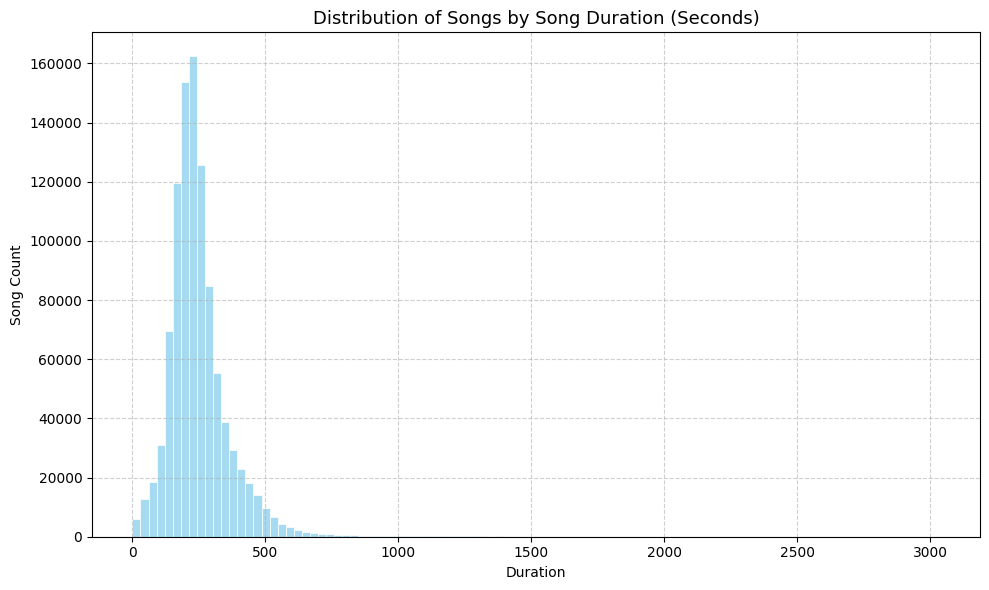

In [24]:
#song duration
plt.figure(figsize=(10, 6))  #making image larger
sns.histplot(
    data=track_metadata_with_genre_df,
    x="duration",
    bins=100,
    color="skyblue",
    edgecolor="white"
)

#labels and title
plt.title("Distribution of Songs by Song Duration (Seconds)", fontsize=13)
plt.xlabel("Duration")
plt.ylabel("Song Count")

#grids
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

That was a look into the song dataset but now we want to also take a look into the user song dataset to see what users are actually listening to.

In [25]:
unique_songs = songs_df['song_id'].nunique()
print("Unique songs:", unique_songs)
unique_songs = songs_df['track_id'].nunique()
print("Unique tracks:", unique_songs)
unique_songs = songs_df['user_id'].nunique()
print("Unique users:", unique_songs)

Unique songs: 495
Unique tracks: 504
Unique users: 12


wanted to see play distribution by song duration

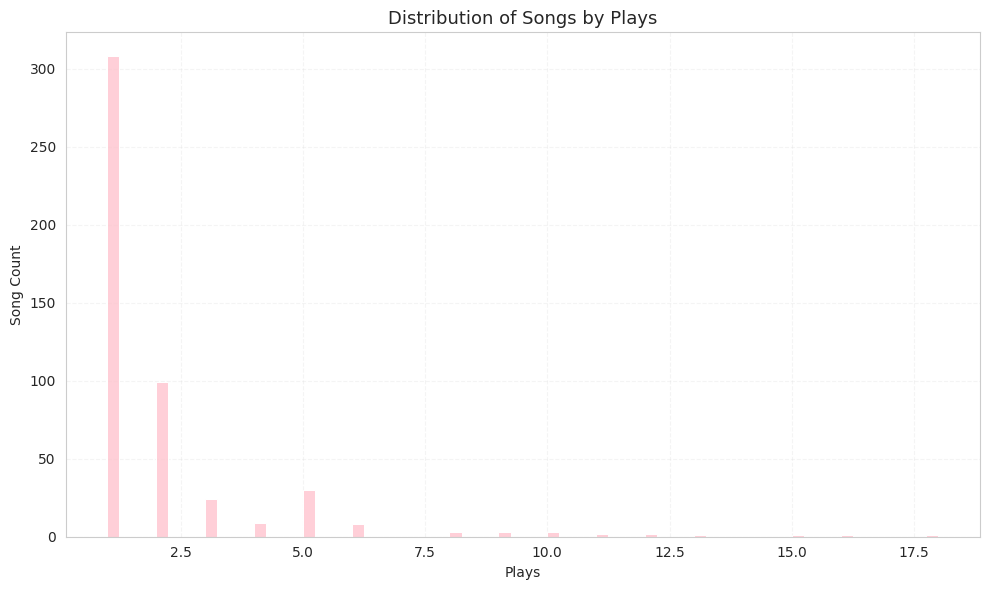

In [58]:
#plays distribution
plt.figure(figsize=(10, 6))  #making image larger
sns.histplot(
    data=df_song_counts,
    color="pink",
    edgecolor="white"
)

#labels and title
plt.title("Distribution of Songs by Plays", fontsize=13)
plt.xlabel("Plays")
plt.ylabel("Song Count")

#grids
plt.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

Most songs are played less than twice. Then we can look at the count of the outliers a little clearer

<Axes: xlabel='plays', ylabel='Count'>

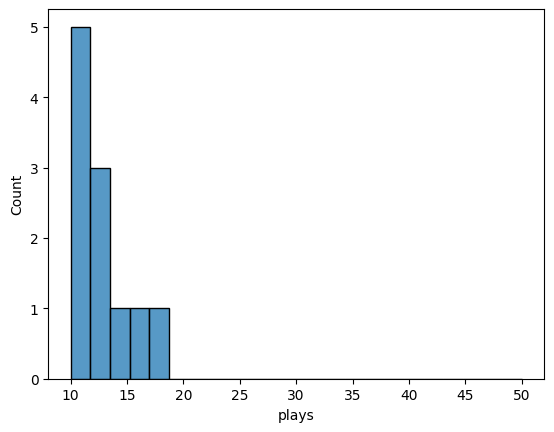

In [27]:
sns.histplot(df_song_counts, binrange = (10,50))

Looking at the ditribution of plays in a strip plot

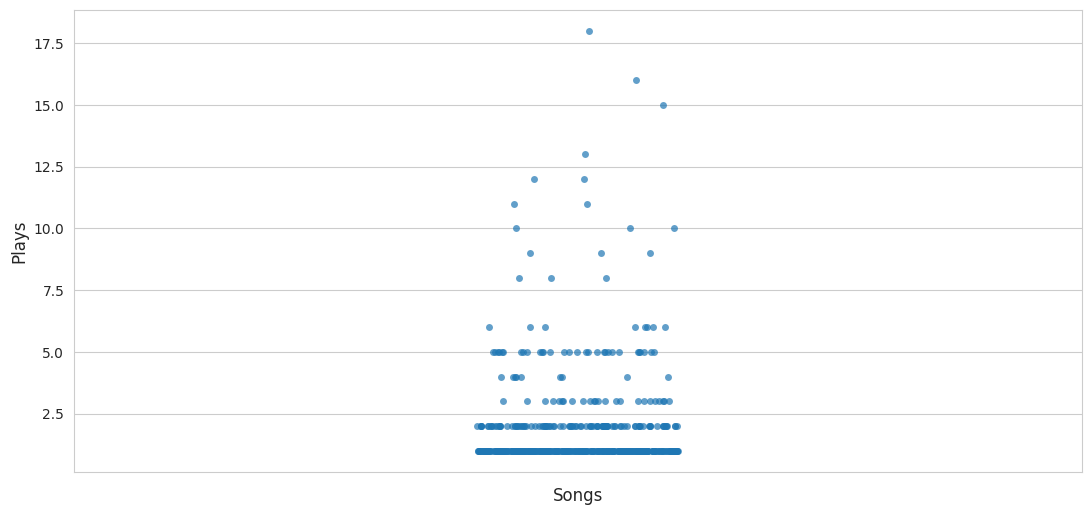

In [28]:
#strip plot of songs

plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

sns.stripplot(
    data=df_song_counts,
    size=5,
    alpha=0.7,
    jitter=True
)

plt.xlabel("Songs", fontsize=12)
plt.ylabel("Plays", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()


Wanted to see if there was any change in distribution if we looked at our played songs and not all songs.

/tmp/ipython-input-2793579091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  d = sns.catplot(


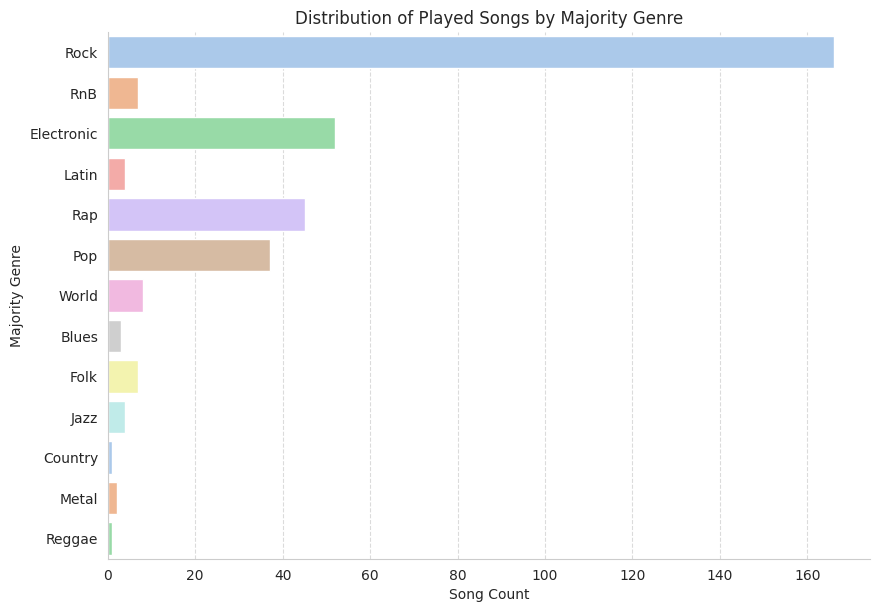

In [29]:

d = sns.catplot(
    data=songs_df,
    y="majority_genre",
    kind="count",
    palette="pastel",
    height=6,
    aspect=1.5
)

#add labels and title
d.set(title="Distribution of Played Songs by Majority Genre")
d.set_axis_labels("Song Count", "Majority Genre")

if d._legend is not None:
    d._legend.remove()

#add grid
d.ax.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

Its still rock thats the most listened to, even in a subset.

Now looking at our users table and how many times our users have played a song

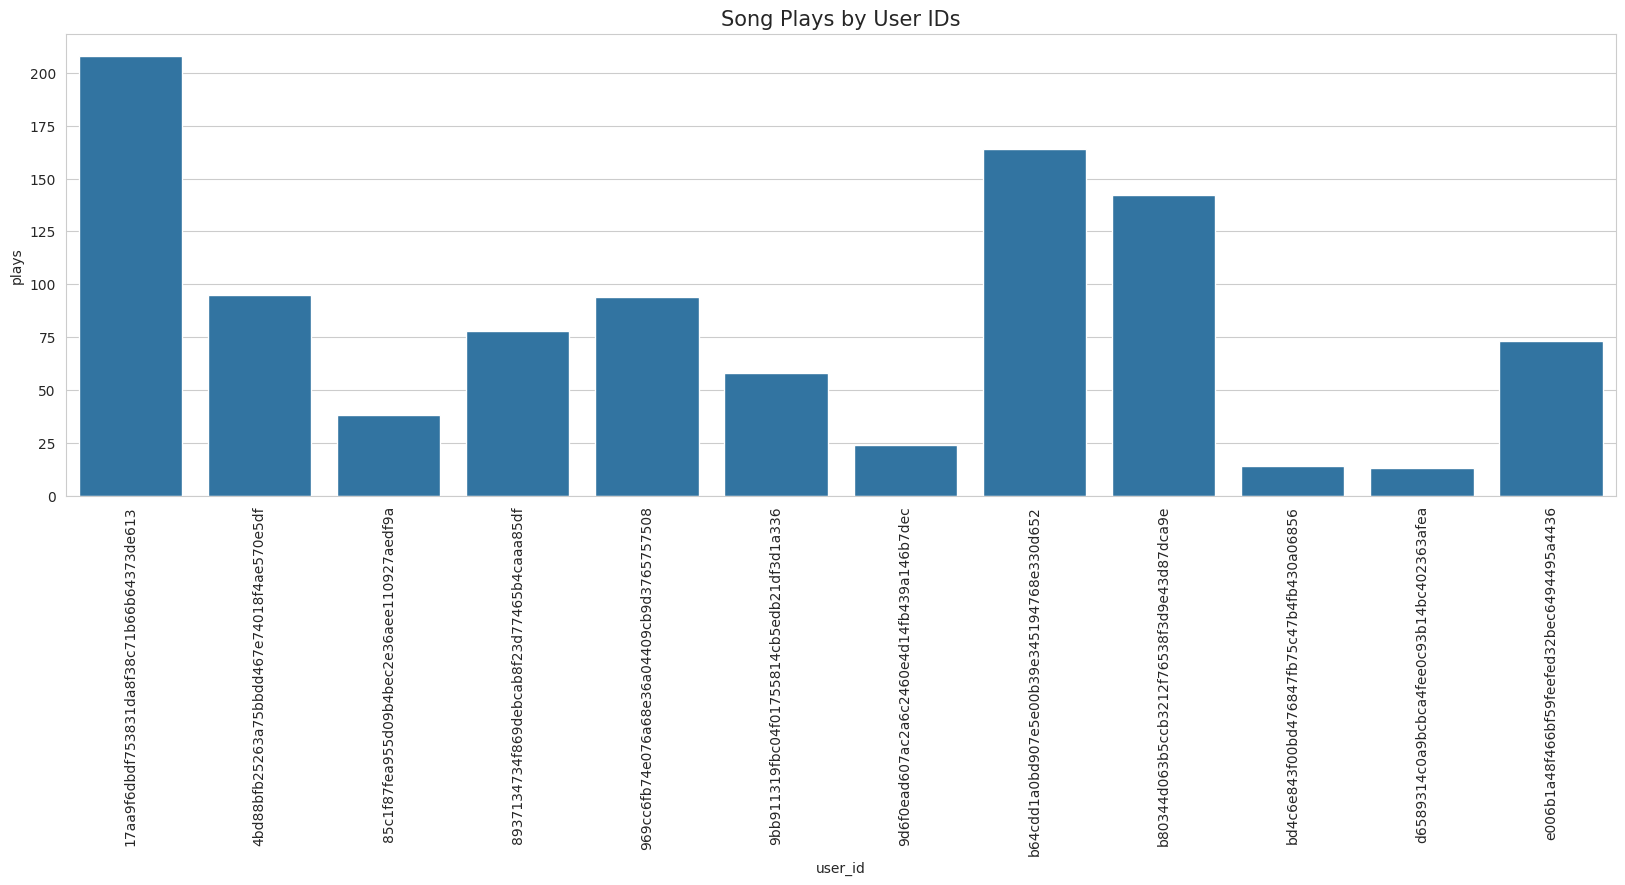

In [30]:

plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_user_counts,
)

plt.title("Song Plays by User IDs", fontsize=15)
plt.xticks(rotation=90, ha='center')


plt.show()


wanted to look at count of song plays by user

<Axes: xlabel='plays', ylabel='Count'>

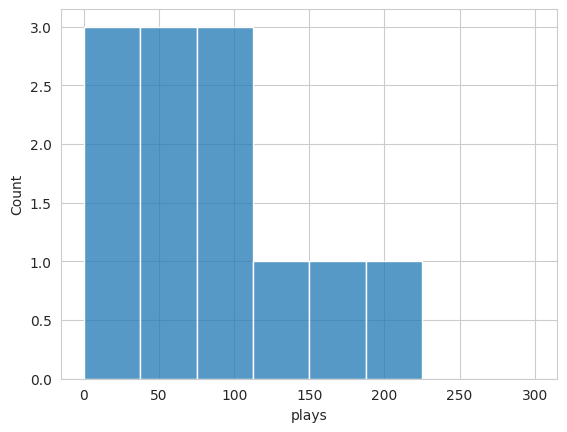

In [31]:
sns.histplot(df_user_counts, binrange = (0,300))

Wanted to look at top played songs by artist, its cool that daft punk is the most popular by plays.

/tmp/ipython-input-9551400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


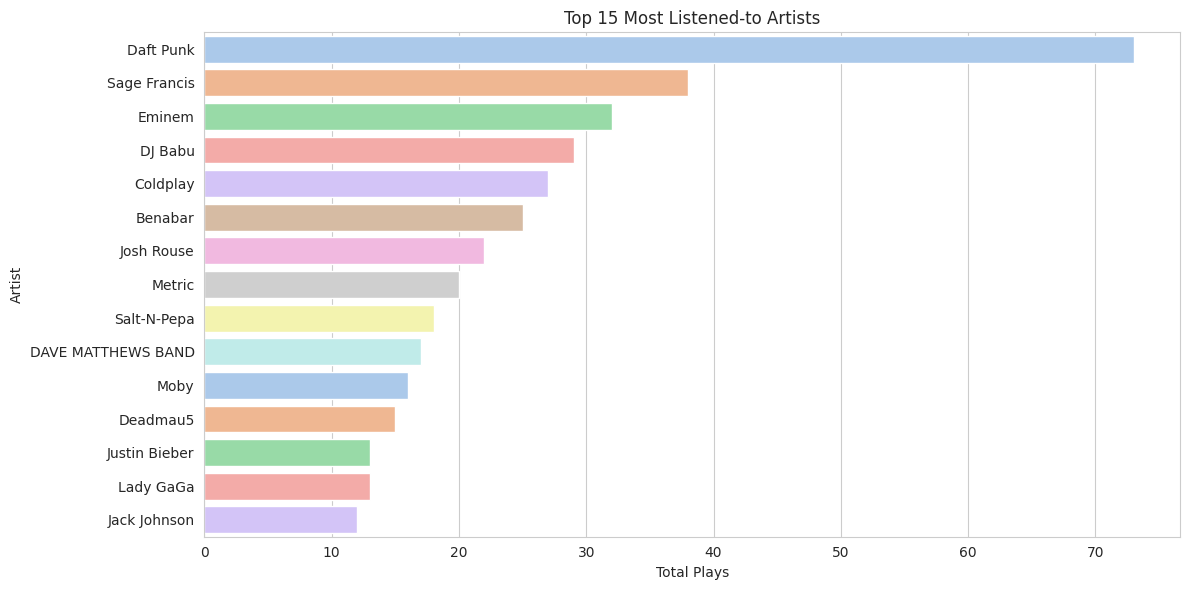

In [32]:
top_artists = (songs_df.groupby('artist_name', as_index=False)['plays'].sum().sort_values('plays', ascending=False).head(15))

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_artists,
    x='plays',
    y='artist_name',
    palette='pastel'
)

plt.title("Top 15 Most Listened-to Artists")
plt.xlabel("Total Plays")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


Also wanted to quickly look at the correlation between song features and plays, we can see that total t

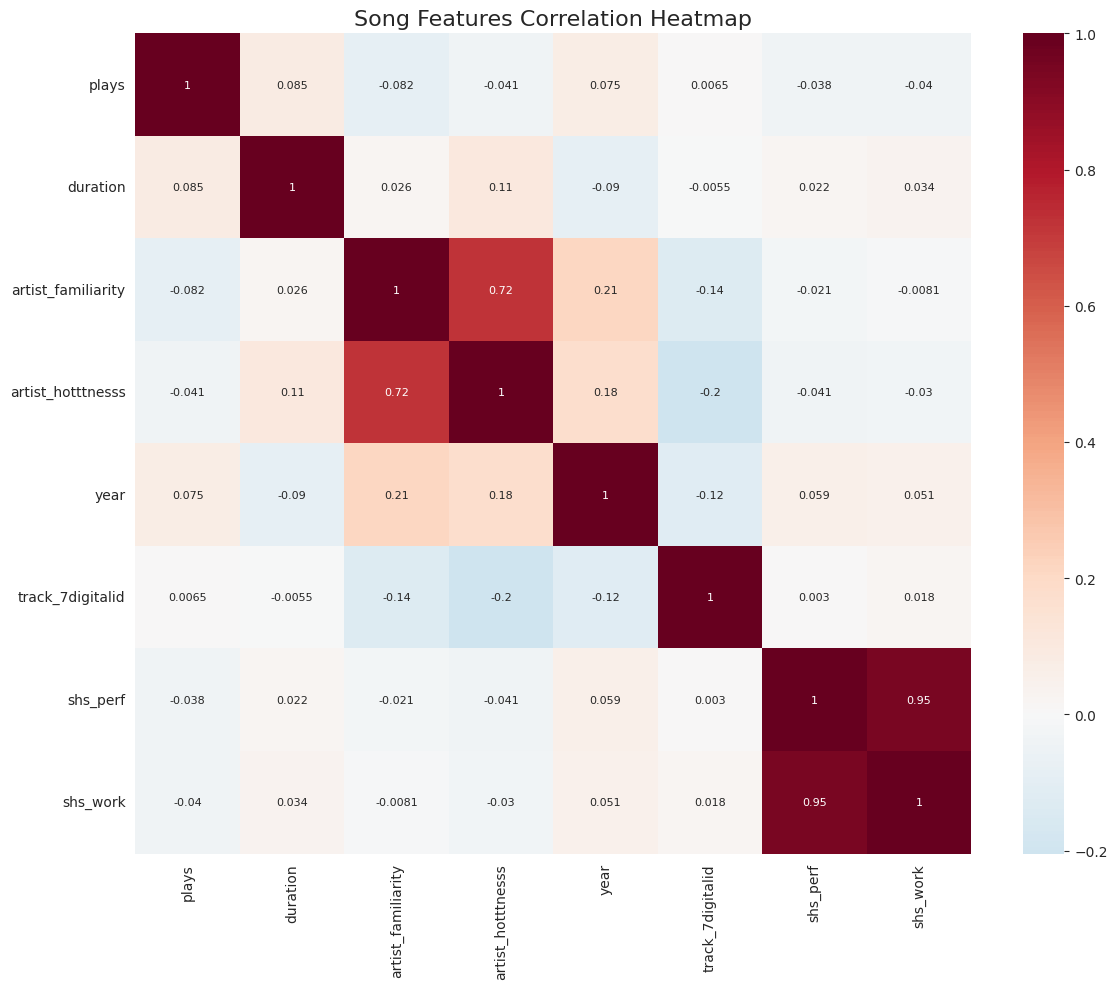

In [33]:

plt.figure(figsize=(12, 10))
#correlation
song_corr = songs_df.corr(numeric_only=True)

#heatmap
sns.heatmap(
    song_corr,
    vmin=song_corr.values.min(),
    vmax=1,
    center=0,
    cmap='RdBu_r',
    annot=True,
    annot_kws={"size": 8}
)

plt.title("Song Features Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

Wanted to take a crack at looking at something a little more complex, we wanted to see how maybe if a user played an artist, what other artists do those users listen to. We. took the top 50 most played artists and created a pivot table that had every artist as a column and how many times a user played it, then we use that information to create an artist - artist correlation matrix and plot some of the findings. It gives us a look into our user's listening patterns, for instance if someone listened to deadmau5 we see that there is a correlation between listening to deadmau5 and RUN-DMC.

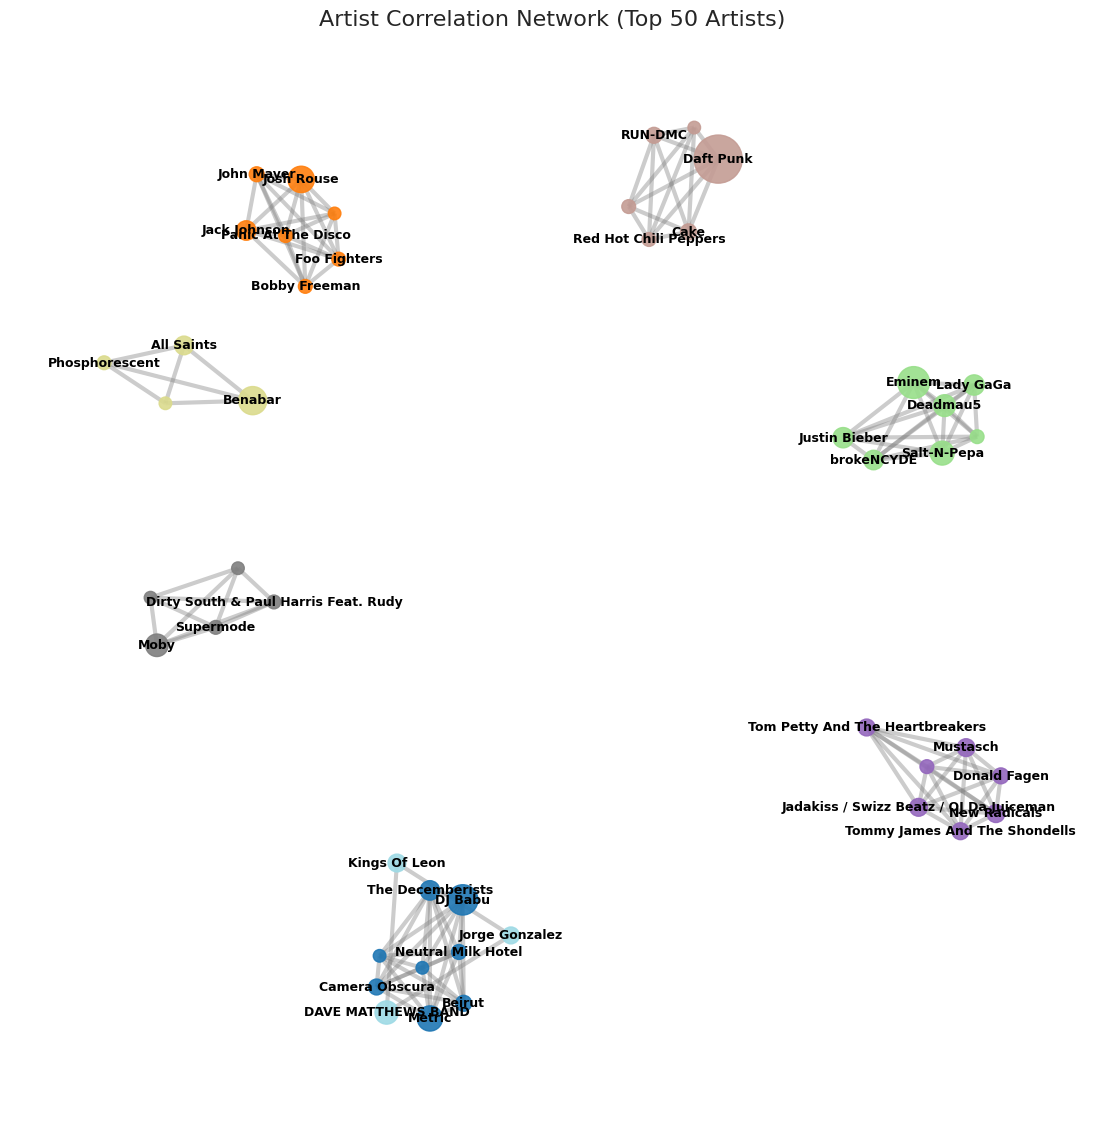

In [53]:

import networkx as nx
from networkx.algorithms import community

#got top 50 artists
top_artists = songs_df.groupby('artist_name')['plays'].sum().sort_values(ascending=False).head(50).index
df_top = songs_df[songs_df['artist_name'].isin(top_artists)]
#sum of plays by user and artist
df_top_agg = df_top.groupby(['user_id', 'artist_name'])['plays'].sum().reset_index()

#create listening matrix by pivoting artists
user_artist = df_top_agg.pivot(index='user_id', columns='artist_name', values='plays').fillna(0)

#find correlation
artist_corr = user_artist.corr()
#artist artist correlation - ai helped
artist_corr = artist_corr.rename_axis('artist_1', axis=0).rename_axis('artist_2', axis=1)
artist_corr_filtered = (
    artist_corr.stack().reset_index(name='correlation')
)
artist_corr_filtered = artist_corr_filtered[
    (artist_corr_filtered['correlation'] > 0.4) &
    (artist_corr_filtered['artist_1'] != artist_corr_filtered['artist_2'])
]

#graph
G = nx.from_pandas_edgelist(
    artist_corr_filtered,
    'artist_1', 'artist_2',
    edge_attr='correlation'
)

#create communities, ai helped with this
communities = community.greedy_modularity_communities(G)
artist_cluster = {}
for i, c in enumerate(communities):
    for artist in c:
        artist_cluster[artist] = i
nx.set_node_attributes(G, artist_cluster, 'cluster')

#node size and colors
node_sizes = (
    df_top_agg.groupby('artist_name')['plays'].sum()
    .reindex(G.nodes()).fillna(1)
)
node_sizes = node_sizes / node_sizes.max() * 1200  # larger for clarity
colors = [artist_cluster[n] for n in G.nodes()]

#plot
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.6, iterations=80, seed=42)

edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[d['correlation']*3 for (_,_,d) in edges],
    alpha=0.4,
    edge_color='gray'
)
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=colors,
    cmap='tab20',
    alpha=0.9
)

#showing some labels but not all, thanks chat
top_labels = df_top_agg.groupby('artist_name')['plays'].sum().sort_values(ascending=False).head(40).index
labels = {n: n if n in top_labels else '' for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold')

plt.title('Artist Correlation Network (Top 50 Artists)', fontsize=16)
plt.axis('off')
plt.show()


Then we started to get ready to cluster the data

# Clustering Preprocessing

In [34]:
songs_df= songs_df[['user_id', 'song_id', 'plays', 'track_id', 'title', 'release',
       'artist_id',  'duration',
       'artist_familiarity', 'artist_hotttnesss', 'year',  'majority_genre', 'minority_genre']]

In [35]:
songs_df ['tot_track_time'] = songs_df ['duration'] * songs_df['plays'] #calculate the amount of time a user spent listening to a particular song

/tmp/ipython-input-2258581471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df ['tot_track_time'] = songs_df ['duration'] * songs_df['plays'] #calculate the amount of time a user spent listening to a particular song


In [36]:
user_total_plays = songs_df.groupby('user_id',as_index=False)['plays'].sum().rename(columns={'plays': 'total_play_count'})

user_unique_songs = songs_df.groupby('user_id',as_index=False)['song_id'].count().rename(columns={'song_id': 'unqiue_song_count'})
user_unique_artists =songs_df.groupby('user_id',as_index=False)['artist_id'].count().rename(columns={'artist_id': 'unqiue_artist_count'})
user_total_time = songs_df.groupby('user_id',as_index=False)['tot_track_time'].sum().rename(columns={'tot_track_time': 'total_play_time'})


user_fav_artist = songs_df.groupby('user_id',as_index=False)['artist_id'].value_counts()
user_fav_artist = user_fav_artist.loc[user_fav_artist.groupby('user_id')['count'].idxmax()].rename(columns={'artist_id': 'fav_artist', "count":"fav_artist_plays"})


user_fav_maj_genre = songs_df.groupby('user_id',as_index=False)['majority_genre'].value_counts()
user_fav_maj_genre = user_fav_maj_genre.loc[user_fav_maj_genre.groupby('user_id')['count'].idxmax()].rename(columns={'majority_genre': 'fav_maj_genre', "count":"fav_maj_count"})
user_fav_min_genre = songs_df.groupby('user_id',as_index=False)['minority_genre'].value_counts()
user_fav_min_genre = user_fav_min_genre.loc[user_fav_min_genre.groupby('user_id')['count'].idxmax()].rename(columns={'minority_genre': 'fav_min_genre', "count":"fav_min_count"})

user_fav_year = songs_df.groupby('user_id',as_index=False)['year'].value_counts()
user_fav_year = user_fav_year[user_fav_year['year'] != 0]
user_fav_year = user_fav_year.loc[user_fav_year.groupby('user_id')['count'].idxmax()].rename(columns={'year': 'fav_year', "count":"year_count"})


user_fav_song = songs_df.loc[songs_df.groupby('user_id')['plays'].idxmax()]
user_fav_song = user_fav_song[['user_id','song_id','plays','duration','tot_track_time']].rename(columns={'song_id': 'fav_song', "plays":"fav_song_plays",'duration':'fav_song_duration','tot_track_time':'tot_fav_song_play_time' })


In [37]:
users_df= pd.merge(user_total_plays,user_total_time, on="user_id")
users_df=pd.merge(users_df,user_unique_artists, on="user_id")
users_df=pd.merge(users_df,user_unique_songs, on="user_id")
users_df=pd.merge(users_df,user_fav_maj_genre, on="user_id")
users_df=pd.merge(users_df,user_fav_min_genre, on="user_id")
users_df=pd.merge(users_df,user_fav_year, on="user_id")
users_df=pd.merge(users_df,user_fav_artist, on="user_id")
users_df=pd.merge(users_df,user_fav_song, on="user_id")


We wanted to look at the correlation between our newly created variables

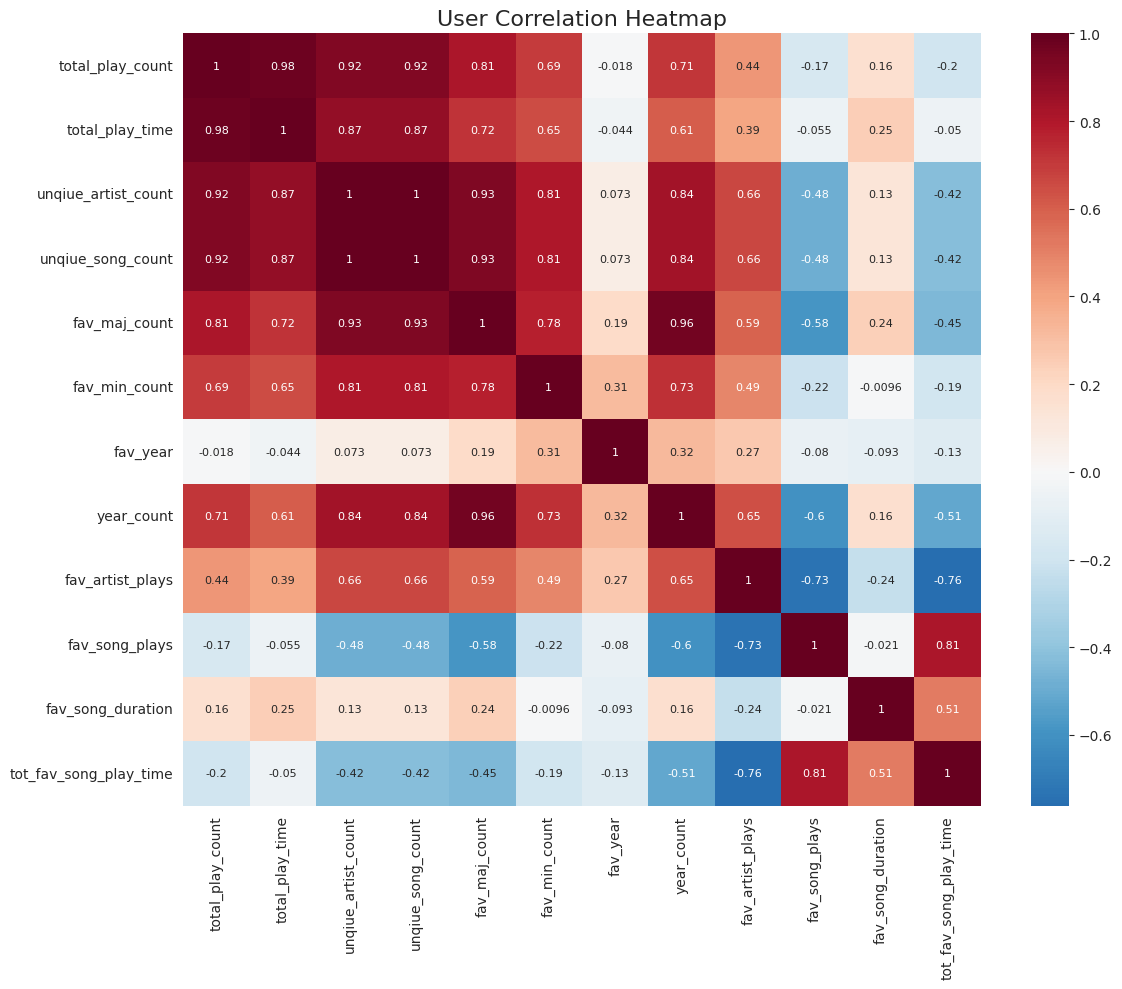

In [38]:

plt.figure(figsize=(12, 10))
#correlation
users_corr = users_df.corr(numeric_only=True)

#heatmap
sns.heatmap(
    users_corr,
    vmin=users_corr.values.min(),
    vmax=1,
    center=0,
    cmap='RdBu_r',
    annot=True,
    annot_kws={"size": 8}
)

plt.title("User Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()